In [2]:
import numpy as np
import pandas as pd

print(np.__version__)
print(pd.__version__)

2.1.3
2.2.3


In [4]:
import os
print("PYTHONPATH:", os.environ.get('PYTHONPATH'))
print("PATH:", os.environ.get('PATH'))

PYTHONPATH: None
PATH: /Users/davidholcer/GitHub/BattleBotsTemplate/.venv/bin:/Users/davidholcer/.opam/default/bin:/Library/Frameworks/Python.framework/Versions/3.13/bin:/Users/davidholcer/Library/Python/3.13:/usr/local/bin/python3:/usr/local/bin:/usr/bin:/bin:/usr/sbin:/sbin:/Users/davidholcer/.oh-my-zsh/custom/plugins/ansiweather:/opt/local/bin:/opt/local/sbin:/Users/davidholcer/.rvm/bin:/Users/davidholcer/.rvm/bin


In [5]:
import sys
print(sys.executable)


/Users/davidholcer/GitHub/BattleBotsTemplate/.venv/bin/python


In [6]:
FILENAME="session_4_results.json"

## Loading in results file
Requires some cleaning due to special chars.

In [7]:
import json
import pandas as pd
import re
from datetime import datetime
from collections import Counter
from nltk import ngrams
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn

# Read the raw JSON file
with open(FILENAME, 'r', encoding='utf-8') as f:
    raw_data = f.read()

# Regex to match improperly escaped emojis (\emoji\)
# Matches a backslash, followed by any character or emoji, then another backslash
cleaned_data = re.sub(r'\\([^n"\\\s])\\?', r'\1', raw_data)

# Save the cleaned JSON file
with open(FILENAME.split('.')[0]+'_cleaned.json', 'w', encoding='utf-8') as f:
    f.write(cleaned_data)

# Validate the cleaned JSON
try:
    import json
    with open(FILENAME.split('.')[0]+'_cleaned.json', 'r', encoding='utf-8') as f:
        all_data = json.load(f)
    print("JSON is valid and cleaned!")
except json.JSONDecodeError as e:
    print(f"JSONDecodeError: {e}")

# Separate posts by bots (alphanumeric) vs real accounts (numeric)
bot_posts = []
real_posts = []

# Function to check if author_id is bot (alphanumeric) or real (numeric)
def is_bot(author_id):
    return any(char.isalpha() for char in author_id)

for post in all_data['posts']:
    if is_bot(post['author_id']):
        bot_posts.append(post)
    else:
        real_posts.append(post)

# Create DataFrames for easier manipulation
posts_df = pd.DataFrame(all_data['posts'])
users_df = pd.DataFrame(all_data['users'])


JSON is valid and cleaned!


In [8]:
users_df

,is_bot,user_id,tweet_count,z_score,username,name,description,location,detectors
0,True,11fb7abf-18e0-4640-8f35-9f1c18157bca,0,0.000000,garden_guru_joy,Joy Patel,Nature lover and permaculture practitioner. Sh...,"Boulder, CO","[{'teamName': 'marieelisedetector1', 'isBot': ..."
1,True,2de2baa5-d0b0-4a7e-8c41-3918821e537a,0,0.000000,tech_savvy_tom,Tom Nguyen,Tech enthusiast and gadget guru. Passionate ab...,None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
2,True,a660b9f0-8aec-4ca1-9a19-0efa34548a36,0,0.000000,wanderlust_writer,Lila Morrison,"Aspiring novelist and avid traveler, sharing s...","Portland, OR","[{'teamName': 'marieelisedetector1', 'isBot': ..."
3,True,11fb7abf-18e0-4640-8f35-9f1c18157bca,0,0.000000,garden_guru_joy,Joy Patel,Nature lover and permaculture practitioner. Sh...,"Boulder, CO","[{'teamName': 'marieelisedetector1', 'isBot': ..."
4,True,2de2baa5-d0b0-4a7e-8c41-3918821e537a,0,0.000000,tech_savvy_tom,Tom Nguyen,Tech enthusiast and gadget guru. Passionate ab...,None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
...,...,...,...,...,...,...,...,...,...
440,False,1963588872,26,-0.003809,USA1LandofFree,Mike Bartlett,,None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
441,False,785567936,80,2.595161,mavsmarie,mavsmarie,delusional #mffl,None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
442,False,1739406020512727040,86,2.883936,Santos1100011,Santos,MAN U✖️RASMUS✖️REAL MADRID✖️VINI JR✖️BARCA✖️YA...,Idk,"[{'teamName': 'marieelisedetector1', 'isBot': ..."
443,False,1646259756011515905,8,-0.870132,herinterludee,ًًً,18 🇬🇭 • blessed & highly favoured 💌🎧🎀🦢// free ...,None,"[{'teamName': 'marieelisedetector1', 'isBot': ..."


## Top N-grams
Showing top N-grams excluding stopwords (requires stopwords corpus from nltk)


<!-- ## Getting N-gram Info
current problems: just single word, bi-gram, expand to tri, up to n
 -->

In [9]:
import json
from collections import Counter
import re
from nltk.util import everygrams
import nltk
nltk.download()
from nltk.corpus import stopwords


# bot_posts = [post for post in posts_data['posts'] if is_bot(post['author_id'])]
# real_posts = [post for post in posts_data['posts'] if not is_bot(post['author_id'])]

def extract_n_grams(text, n):
    stop_words = set(stopwords.words('english'))
    tokens = [word.lower() for word in re.findall(r'\b\w+\b', text) if word.lower() not in stop_words]
    return list(everygrams(tokens, max_len=n))

# Apply n-gram extraction to posts
bot_texts = [post['text'] for post in bot_posts]
real_texts = [post['text'] for post in real_posts]

# Apply n-gram extraction (up to 3-grams)
bot_n_grams = Counter([gram for text in bot_texts for gram in extract_n_grams(text, 3)])
real_n_grams = Counter([gram for text in real_texts for gram in extract_n_grams(text, 3)])

# Display top 10 n-grams for bots and real accounts
print("Top 10 Bot N-grams:", bot_n_grams.most_common(10))
print("Top 10 Real Account N-grams:", real_n_grams.most_common(10))

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml
Top 10 Bot N-grams: [(('today',), 18), (('fossil',), 14), (('fossil', 'fuels'), 14), (('fuels',), 14), (('n',), 14), (('like',), 12), (('n', 'n'), 11), (('life',), 10), (('day',), 10), (('every',), 9)]
Top 10 Real Account N-grams: [(('co',), 5913), (('https',), 5910), (('https', 'co'), 5910), (('https', 'co', 'twitter_link'), 5910), (('co', 'twitter_link'), 5910), (('twitter_link',), 5910), (('like',), 1037), (('mention',), 884), (('game',), 599), (('get',), 584)]


<!-- ## Getting text stats
current problems: unreadable, describe number of links total compared to total number of tweets, and total word count for both bots and nonbots. -->

## Seeing Key Post Statistics
Here we can see some key post statistics including emoji, link, hashtag usage and avg. number of words/chars by user type (bot vs. not)


In [10]:
# Count features and words
def count_text_stats(text):
    links = len(re.findall(r'http[s]?://\S+', text))
    hashtags = len(re.findall(r'#\w+', text))
    emoji_pattern = len(re.findall(r'[\U0001F300-\U0001F6FF\U0001F900-\U0001F9FF\U0001FA70-\U0001FAFF✈️]', text))
    word_count = len(re.findall(r'\b\w+\b', text))  # Word count
    chars= len(text)
    return links, hashtags, emoji_pattern, word_count,chars

# Apply text stat extraction
bot_stats = [count_text_stats(post['text']) for post in bot_posts]
real_stats = [count_text_stats(post['text']) for post in real_posts]

# Convert to DataFrame for easier analysis
bot_stats_df = pd.DataFrame(bot_stats, columns=['links', 'hashtags', 'emoji_pattern', 'word_count', 'chars'])
real_stats_df = pd.DataFrame(real_stats, columns=['links', 'hashtags', 'emoji_pattern', 'word_count','chars'])

# Summarize totals and ratios
bot_total = len(bot_posts)
real_total = len(real_posts)
all_total = bot_total+real_total

# Calculate total links
bot_links_total = bot_stats_df['links'].sum()
real_links_total = real_stats_df['links'].sum()

# Calculate link averages
bot_avg_links = bot_links_total / bot_total if bot_total > 0 else 0
real_avg_links = real_links_total / real_total if real_total > 0 else 0

# Calculate total hashtags
bot_hashtag_total = bot_stats_df['hashtags'].sum()
real_hashtag_total = real_stats_df['hashtags'].sum()

# Calculate hashtag averages
bot_avg_hashtags = bot_hashtag_total / bot_total if bot_total > 0 else 0
real_avg_hashtags = real_hashtag_total / real_total if real_total > 0 else 0

# Calculate total emojis
bot_specialChar_total = bot_stats_df['emoji_pattern'].sum()
real_specialChar_total = real_stats_df['emoji_pattern'].sum()

# Calculate emojis averages
bot_avg_specialChars = bot_specialChar_total / bot_total if bot_total > 0 else 0
real_avg_specialChars = real_specialChar_total / real_total if real_total > 0 else 0

#Calculate total word count
bot_word_count_total = bot_stats_df['word_count'].sum()
real_word_count_total = real_stats_df['word_count'].sum()

# Calculate word count averages
bot_avg_words = bot_word_count_total / bot_total if bot_total > 0 else 0
real_avg_words = real_word_count_total / real_total if real_total > 0 else 0

#Calculate total word count
bot_chars_total = bot_stats_df['chars'].sum()
real_chars_total = real_stats_df['chars'].sum()

# Calculate word count averages
bot_avg_chars = bot_chars_total / bot_total if bot_total > 0 else 0
real_avg_chars = real_chars_total / real_total if real_total > 0 else 0

# Print out the results
print(f"Total Bot Posts: {bot_total} ({round(bot_total/all_total*100,2)}%), Total Real Account Posts: {real_total} ({round(real_total/all_total*100,2)}%)")
print(f"Bot Links Total: {bot_links_total}, Real Account Links Total: {real_links_total}")
print(f"Bot Average Links: {round(bot_avg_links*100,2)}%, Real Account Average Links: {round(real_avg_links*100,2)}%")
print(f"Bot Hashtag Total: {bot_hashtag_total}, Real Account Links Total: {real_hashtag_total}")
print(f"Bot Average Hashtags: {round(bot_avg_hashtags*100,2)}%, Real Account Average Hashtags: {round(real_avg_hashtags*100,2)}%")
print(f"Bot Emojis Total: {bot_specialChar_total}, Real Account Links Total: {real_specialChar_total}")
print(f"Bot Average Emojis: {round(bot_avg_specialChars*100,2)}%, Real Account Average Emojis: {round(real_avg_specialChars*100,2)}%")
print(f"Bot Word Count Total: {bot_word_count_total}, Real Account Word Count Total: {real_word_count_total}")
print(f"Bot Average Words: {int(bot_avg_words)}, Real Account Average Words: {int(real_avg_words)}")
print(f"Bot Char Count Total: {bot_chars_total}, Real Account Char Count Total: {real_chars_total}")
print(f"Bot Average Chars: {int(bot_avg_chars)}, Real Account Average Chars: {int(real_avg_chars)}")

Total Bot Posts: 136 (1.24%), Total Real Account Posts: 10875 (98.76%)
Bot Links Total: 8, Real Account Links Total: 5910
Bot Average Links: 5.88%, Real Account Average Links: 54.34%
Bot Hashtag Total: 22, Real Account Links Total: 2258
Bot Average Hashtags: 16.18%, Real Account Average Hashtags: 20.76%
Bot Emojis Total: 56, Real Account Links Total: 4781
Bot Average Emojis: 41.18%, Real Account Average Emojis: 43.96%
Bot Word Count Total: 1700, Real Account Word Count Total: 211754
Bot Average Words: 12, Real Account Average Words: 19
Bot Char Count Total: 9359, Real Account Char Count Total: 1145431
Bot Average Chars: 68, Real Account Average Chars: 105


<!-- ## Getting Time distribution heatmap
current problems: show two heatmaps for bots vs. nonbots. make the heatmaps hours compared to user. add barchart similar to following code:

```
import seaborn as sns
sns.set_theme(style="ticks")

# Load the planets dataset and initialize the figure
planets = sns.load_dataset("planets")
g = sns.JointGrid(data=planets, x="year", y="distance", marginal_ticks=True)

# Set a log scaling on the y axis
g.ax_joint.set(yscale="log")

# Create an inset legend for the histogram colorbar
cax = g.figure.add_axes([.15, .55, .02, .2])

# Add the joint and marginal histogram plots
g.plot_joint(
    sns.histplot, discrete=(True, False),
    cmap="light:#03012d", pmax=.8, cbar=True, cbar_ax=cax
)
g.plot_marginals(sns.histplot, element="step", color="#03012d")
``` -->

## Seeing Time Distribution of Posts
Here we can compare the bot vs. real account post time distribution


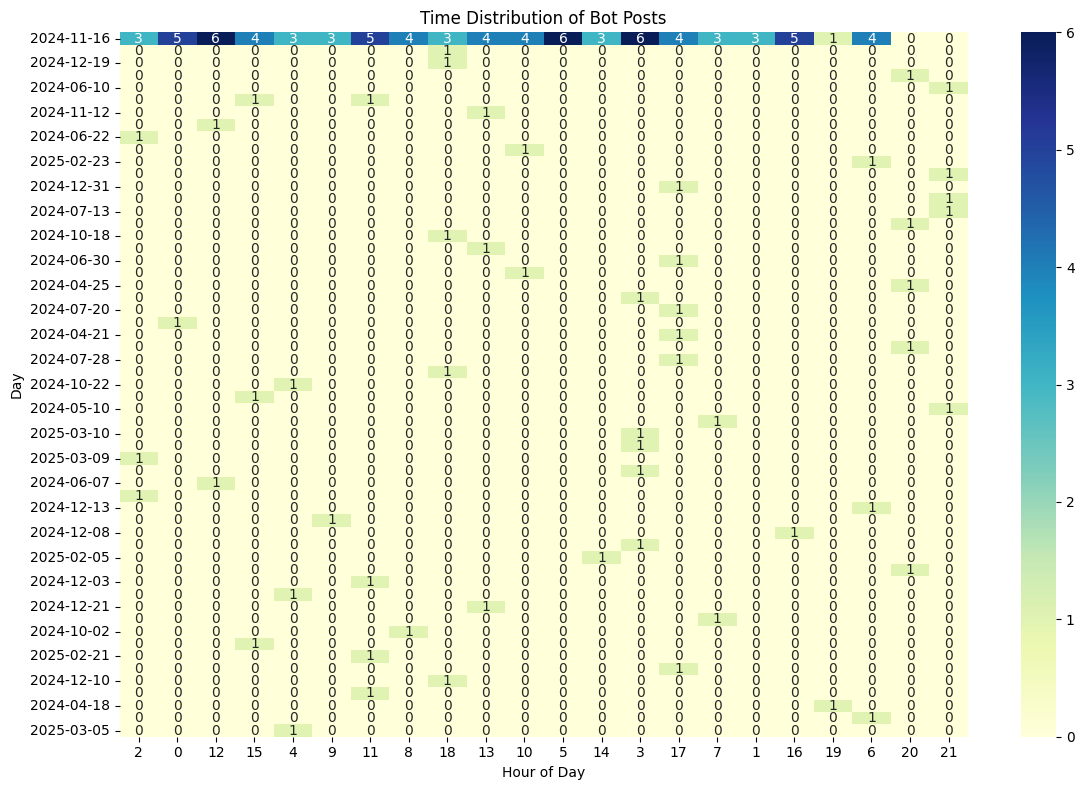

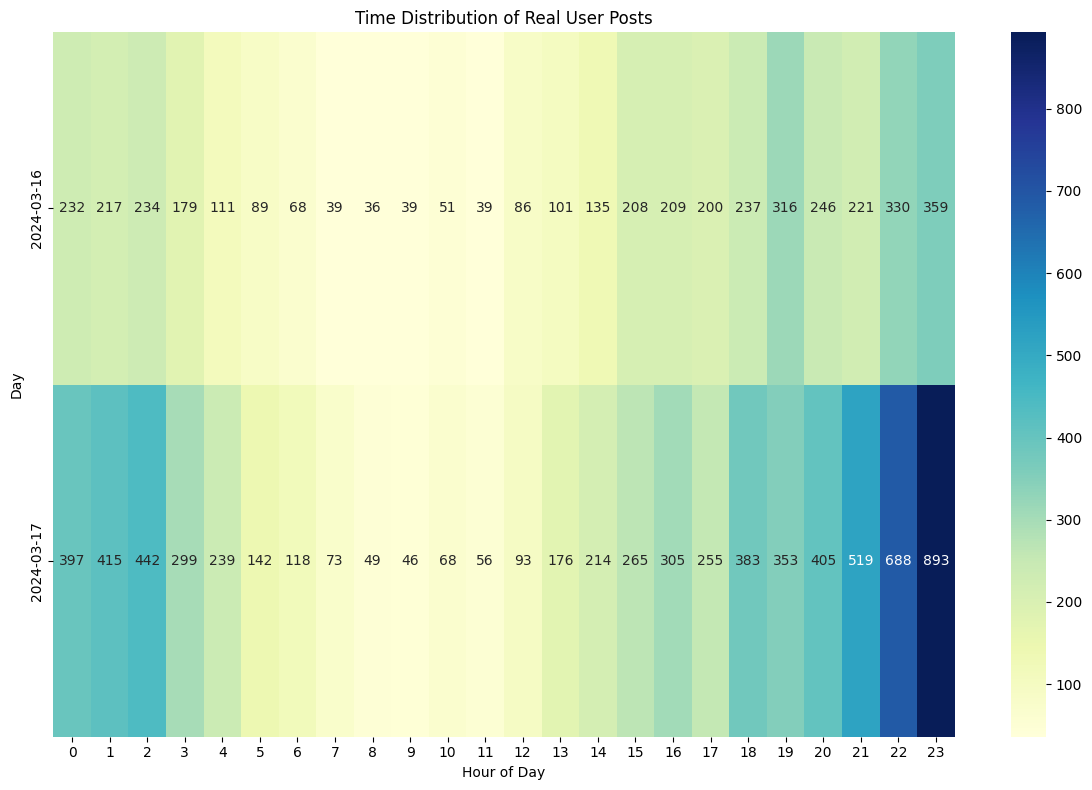

In [11]:
from collections import defaultdict

# Separate posts into bot and real posts lists
# bot_posts = [post for post in posts_data['posts'] if is_bot(post['author_id'])]
# real_posts = [post for post in posts_data['posts'] if not is_bot(post['author_id'])]

# Convert to DataFrames
bot_posts_df = pd.DataFrame(bot_posts)
real_posts_df = pd.DataFrame(real_posts)


# Function to prepare heatmap data from DataFrame
def prepare_heatmap_data(df):
    heatmap_data = defaultdict(lambda: defaultdict(int))
    for _, row in df.iterrows():
        created_at = pd.to_datetime(row['created_at'])
        day = created_at.date()
        hour = created_at.hour
        heatmap_data[day][hour] += 1
    return pd.DataFrame(heatmap_data).T.fillna(0)

def create_heatmap(df, title):
    heatmap_data = prepare_heatmap_data(df)
    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt=".0f")
    plt.title(title)
    plt.xlabel("Hour of Day")
    plt.ylabel("Day")
    plt.tight_layout()
    plt.show()

# Generate heatmaps for bot posts and real posts
create_heatmap(bot_posts_df, "Time Distribution of Bot Posts")
create_heatmap(real_posts_df, "Time Distribution of Real User Posts")


## Seeing Confidence Distribution, Std Deviation. Include Matthews Correlation Coefficient
Here I graph the detector results and some key stats on the confidence distribution. As well I graph the Matthews Correlation Coefficient for each detector.


In [12]:
!pip3 install tabulate

/var/folders/gg/2wr1srtx1r72kyp3cb_nzs6m0000gn/T/ipykernel_43128/2327013524.py:28: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  mcc_scores = detector_df.groupby('teamName', group_keys=False).apply(



Detector Confidence Statistics:
+----+---------------------+------------------------------+-------------------+----------------------+---------+
|    | Detector            | Category                     |   Mean Confidence |   Standard Deviation |   Count |
+====+=====================+==============================+===================+======================+=========+
|  0 | marieelisedetector1 | Correct Bot Prediction       |          95       |              0       |      28 |
+----+---------------------+------------------------------+-------------------+----------------------+---------+
|  1 | marieelisedetector1 | Incorrect Bot Prediction     |           0       |              0       |       0 |
+----+---------------------+------------------------------+-------------------+----------------------+---------+
|  2 | marieelisedetector1 | Correct Non-Bot Prediction   |           1       |              0       |     293 |
+----+---------------------+------------------------------+----

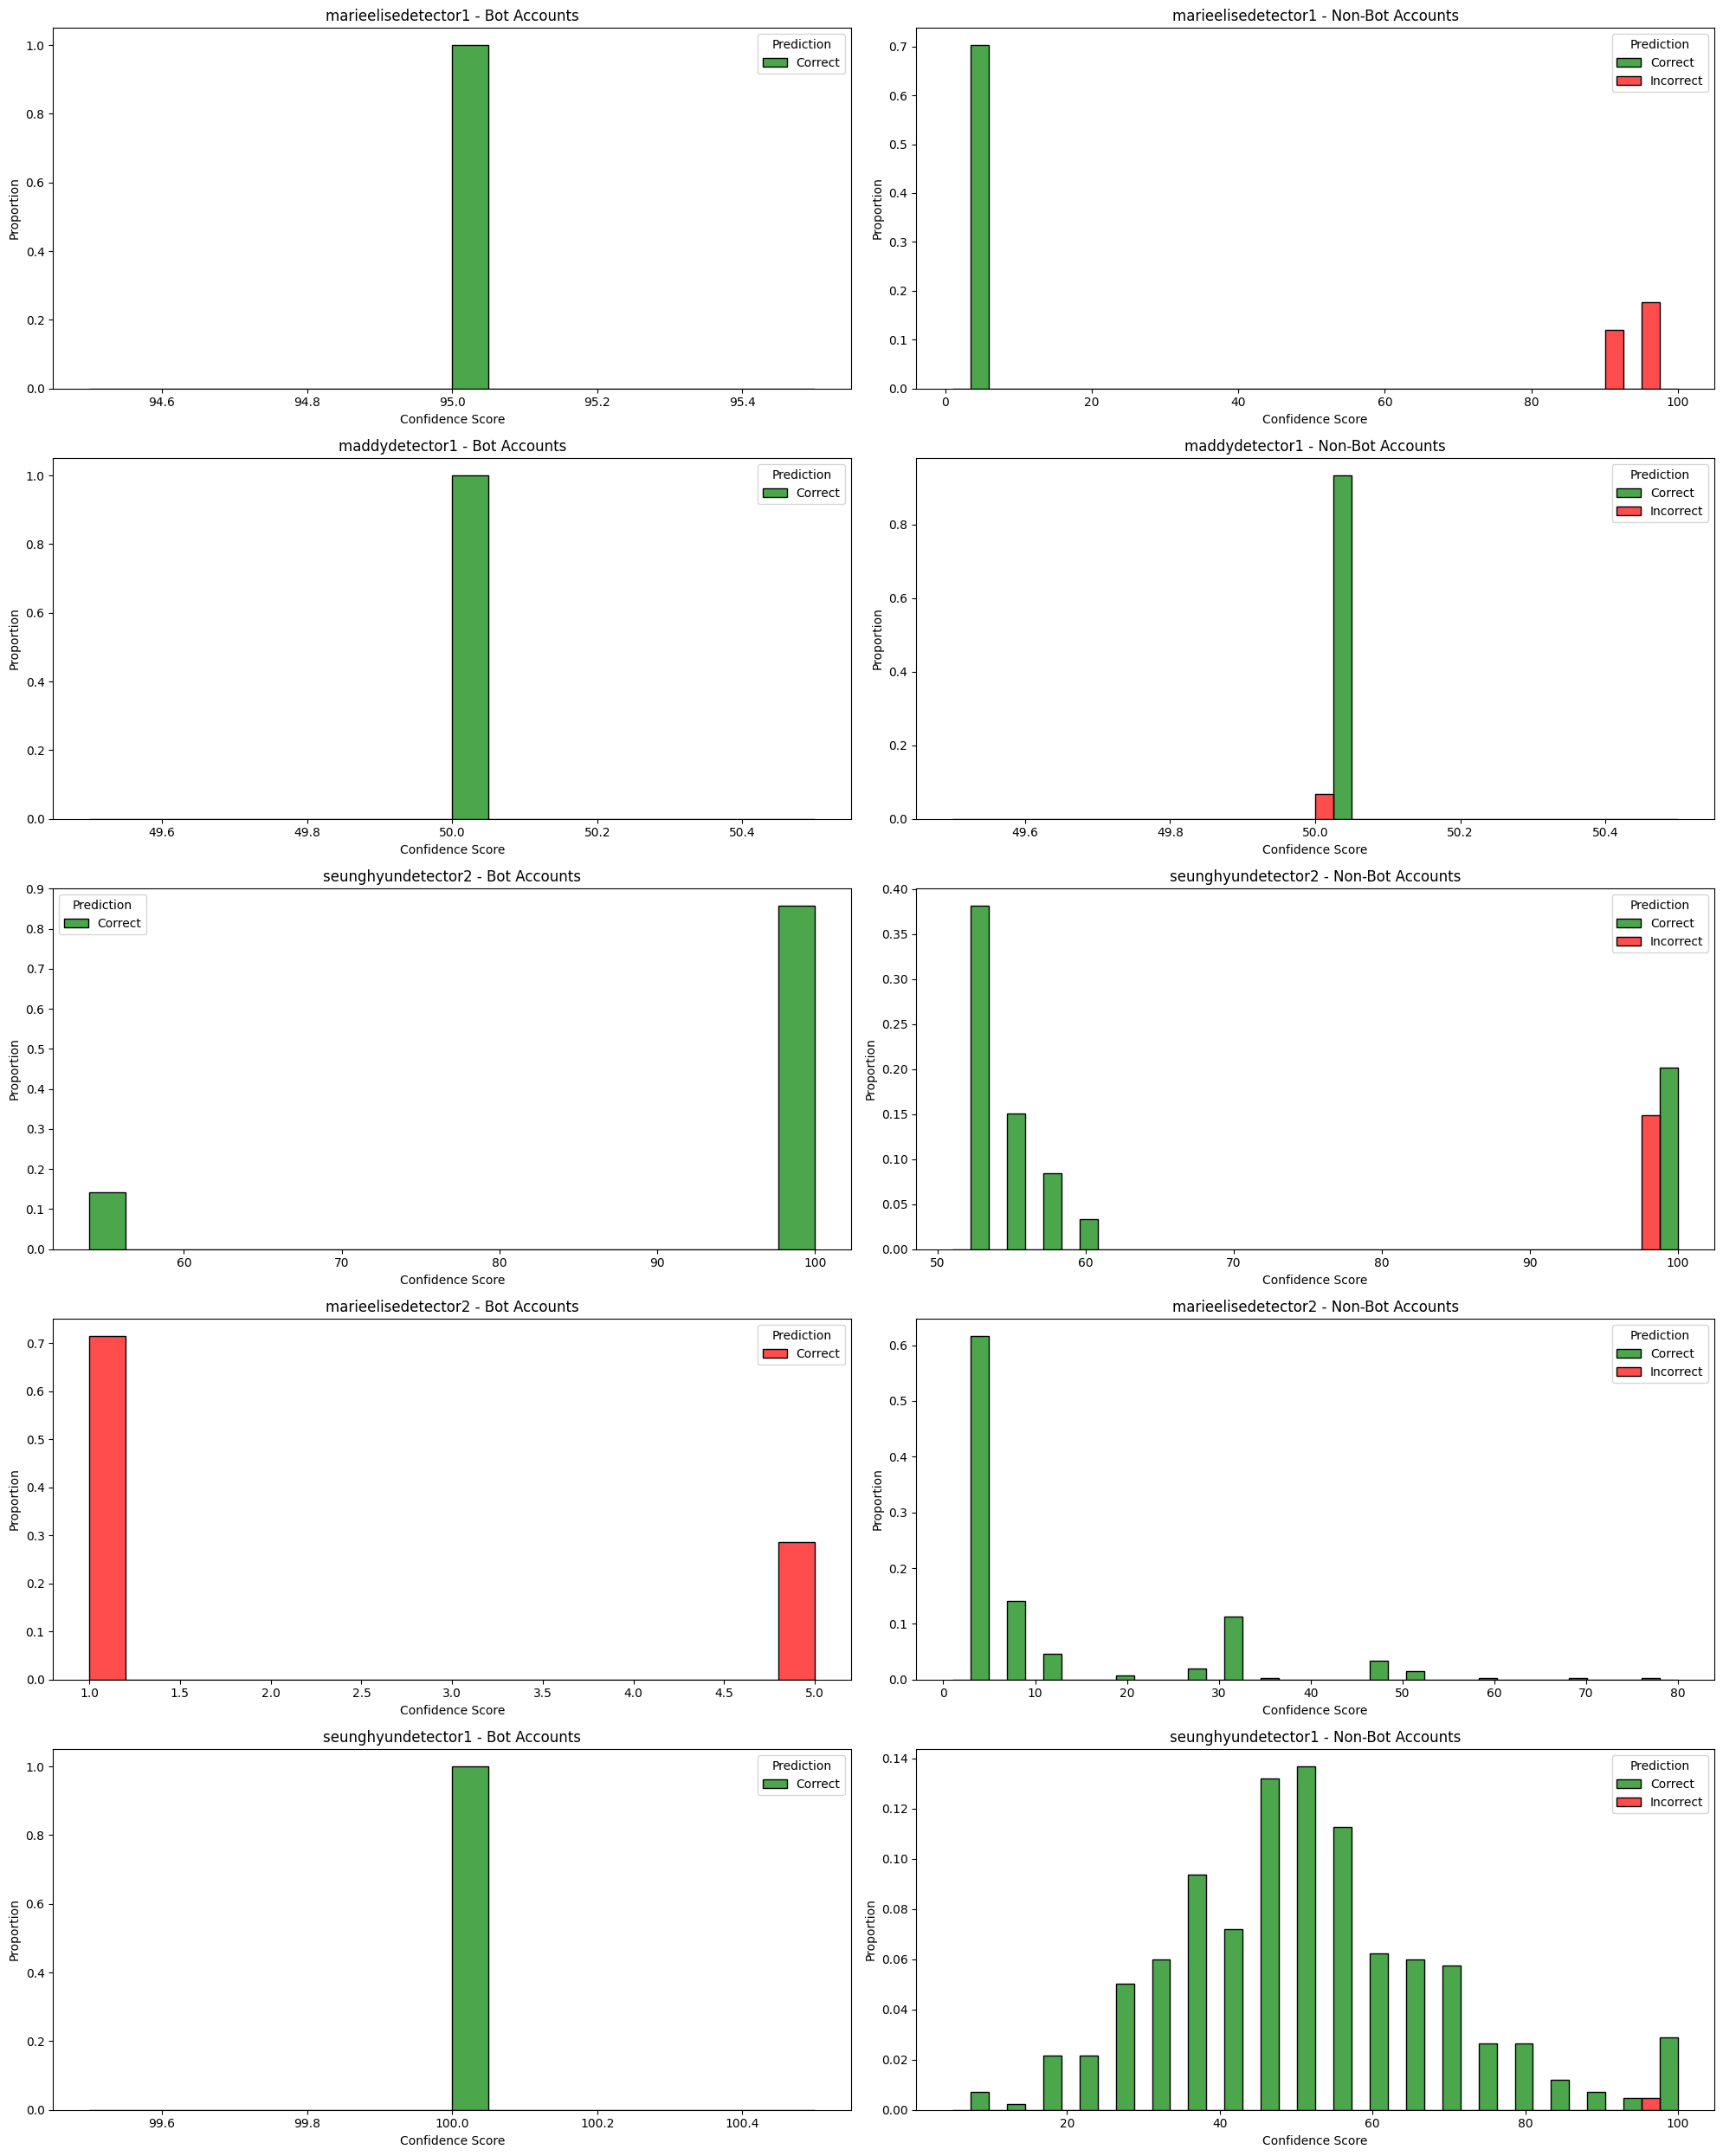

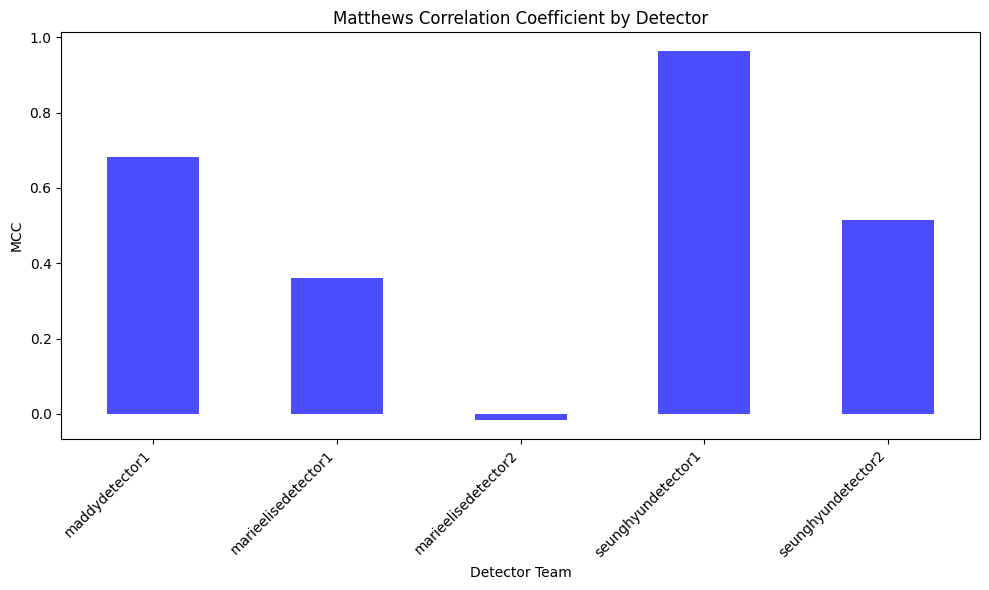

In [13]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import matthews_corrcoef
from tabulate import tabulate  # For pretty-printing tables

# Prepare detector data
detector_data = []
for _, user in users_df.iterrows():
    true_label = user["is_bot"]
    username = user["username"]
    for detector in user['detectors']:
        detector_data.append({
            'teamName': detector['teamName'],
            'predicted_bot': detector['isBot'],
            'confidence': detector['confidence'],
            'username': username,
            'true_bot': true_label,
            'correct_prediction': detector['isBot'] == true_label
        })

detector_df = pd.DataFrame(detector_data)

# Calculate MCC for each detector, avoiding DeprecationWarning
def calculate_mcc(group):
    return matthews_corrcoef(group['true_bot'], group['predicted_bot'])

mcc_scores = detector_df.groupby('teamName', group_keys=False).apply(
    lambda group: calculate_mcc(group[['true_bot', 'predicted_bot']])
)

# Calculate statistics for each detector and category
stats = []
for team in detector_df['teamName'].unique():
    team_data = detector_df[detector_df['teamName'] == team]
    for category, data in {
        'Correct Bot Prediction': team_data[(team_data['true_bot']) & (team_data['correct_prediction'])],
        'Incorrect Bot Prediction': team_data[(team_data['true_bot']) & (~team_data['correct_prediction'])],
        'Correct Non-Bot Prediction': team_data[(~team_data['true_bot']) & (team_data['correct_prediction'])],
        'Incorrect Non-Bot Prediction': team_data[(~team_data['true_bot']) & (~team_data['correct_prediction'])]
    }.items():
        stats.append({
            'Detector': team,
            'Category': category,
            'Mean Confidence': data['confidence'].mean() if not data.empty else 0,
            'Standard Deviation': data['confidence'].std() if not data.empty else 0,
            'Count': len(data)
        })

stats_df = pd.DataFrame(stats)

# Pretty print the stats table
print("\nDetector Confidence Statistics:")
print(tabulate(stats_df, headers='keys', tablefmt='grid'))

# Interpret MCC scores
interpretation = []
for team, mcc in mcc_scores.items():
    if mcc > 0.7:
        quality = "Excellent"
    elif mcc > 0.4:
        quality = "Good"
    elif mcc > 0.2:
        quality = "Fair"
    else:
        quality = "Poor"
    interpretation.append({
        'Detector': team,
        'MCC': mcc,
        'Quality': quality
    })

mcc_interpretation_df = pd.DataFrame(interpretation)

# Pretty print MCC interpretation
print("\nMCC Interpretation:")
print(tabulate(mcc_interpretation_df, headers='keys', tablefmt='grid'))

# Plot confidence distributions per detector
unique_detectors = detector_df['teamName'].unique()
n_detectors = len(unique_detectors)
fig, axes = plt.subplots(n_detectors, 2, figsize=(20, 5 * n_detectors))

for i, detector in enumerate(unique_detectors):
    detector_data = detector_df[detector_df['teamName'] == detector]
    
    # Bot accounts
    bot_data = detector_data[detector_data['true_bot']]
    sns.histplot(bot_data, x='confidence', hue='correct_prediction', ax=axes[i, 0], 
                 bins=20, stat='probability', multiple='dodge', 
                 palette={True: 'green', False: 'red'}, alpha=0.7)
    axes[i, 0].set_title(f"{detector} - Bot Accounts")
    axes[i, 0].set_xlabel("Confidence Score")
    axes[i, 0].set_ylabel("Proportion")
    axes[i, 0].legend(title="Prediction", labels=["Correct", "Incorrect"])

    # Non-bot accounts
    non_bot_data = detector_data[~detector_data['true_bot']]
    sns.histplot(non_bot_data, x='confidence', hue='correct_prediction', ax=axes[i, 1], 
                 bins=20, stat='probability', multiple='dodge', 
                 palette={True: 'green', False: 'red'}, alpha=0.7)
    axes[i, 1].set_title(f"{detector} - Non-Bot Accounts")
    axes[i, 1].set_xlabel("Confidence Score")
    axes[i, 1].set_ylabel("Proportion")
    axes[i, 1].legend(title="Prediction", labels=["Correct", "Incorrect"])

plt.tight_layout()
plt.show()




# Plot MCC scores
plt.figure(figsize=(10, 6))
mcc_scores.plot(kind='bar', color='blue', alpha=0.7)
plt.title("Matthews Correlation Coefficient by Detector")
plt.xlabel("Detector Team")
plt.ylabel("MCC")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


## Seeing User Score
Here we get the user score for bots/detectors


In [ ]:
# Add scoring system
detector_df['scbot_user_scoreore'] = 0

# Scoring logic for bot users
detector_df.loc[(detector_df['true_bot']) & (~detector_df['predicted_bot']), 'bot_user_score'] = 5
detector_df.loc[(detector_df['true_bot']) & (detector_df['predicted_bot']), 'bot_user_score'] = 1

# Group by bot usernames to calculate the average bot score per user
bot_user_scores = (
    detector_df[detector_df['true_bot']]
    .groupby('username')
    .agg(
        avg_bot_score=('bot_user_score', 'mean'),
        total_scores=('bot_user_score', 'sum'),
        detection_count=('predicted_bot', 'sum'),
        total_predictions=('username', 'count')
    )
    .reset_index()
)

# Add percentage detected (optional for interpretation)
bot_user_scores['percent_detected'] = (
    bot_user_scores['detection_count'] / bot_user_scores['total_predictions'] * 100
)

# Pretty print bot user scores
from tabulate import tabulate

print("\nBot User Scores:")
print(tabulate(bot_user_scores, headers='keys', tablefmt='grid'))

# Add scoring system
detector_df['score'] = 0

# For correct predictions, award 5 points; for incorrect predictions, award 1 point
detector_df.loc[detector_df['correct_prediction'], 'score'] = 5
detector_df.loc[~detector_df['correct_prediction'], 'score'] = 1

# Calculate averages for each detector
detector_averages = detector_df.groupby('teamName').agg(
    avg_score=('score', 'mean'),
    # avg_bot_score=('bot_score', 'mean')
).reset_index()

# Display detector averages
print("\nDetector Averages (Correct/Incorrect Prediction Scores):")
print(detector_averages)


Bot User Scores:
+----+-------------------+-----------------+----------------+-------------------+---------------------+--------------------+
|    | username          |   avg_bot_score |   total_scores |   detection_count |   total_predictions |   percent_detected |
+====+===================+=================+================+===================+=====================+====================+
|  0 | aaronjayjack      |             1.8 |             36 |                16 |                  20 |                 80 |
+----+-------------------+-----------------+----------------+-------------------+---------------------+--------------------+
|  1 | bethanybo         |             1.8 |             36 |                16 |                  20 |                 80 |
+----+-------------------+-----------------+----------------+-------------------+---------------------+--------------------+
|  2 | davidholcer       |             1.8 |             36 |                16 |                  20 |    

: 